In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


In [124]:
data = pd.read_csv(
    r'C:\Cursos\Analise_de_dados\Cases\Mercado de Games\PS4_GamesSales.csv', encoding='latin-1')
data = data.dropna(subset='Year')
data['Year'] = pd.to_numeric(data['Year']).apply(lambda line: int((line)))


In [125]:
# ANALISE DE VENDAS POR GÊNERO
analise = data.groupby(by=['Genre']).sum()[
    ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].reset_index()


[]

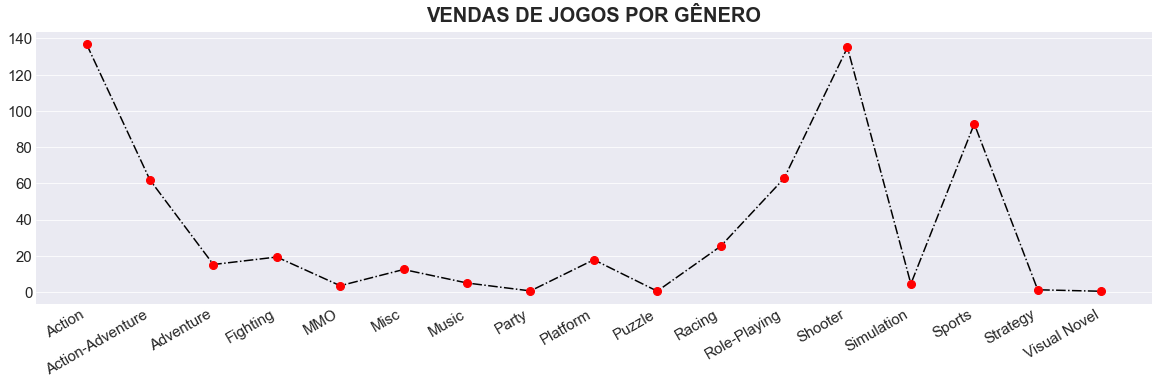

In [126]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.grid(axis='x')
plt.title('VENDAS DE JOGOS POR GÊNERO', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
plt.plot(analise['Genre'], analise['Global'], color='black', marker='o', ms=8,
         mec='red', markerfacecolor='red', ls='-.')
plt.xticks(rotation=30, ha='right', size=15)
plt.yticks(size=15)
plt.plot()


[]

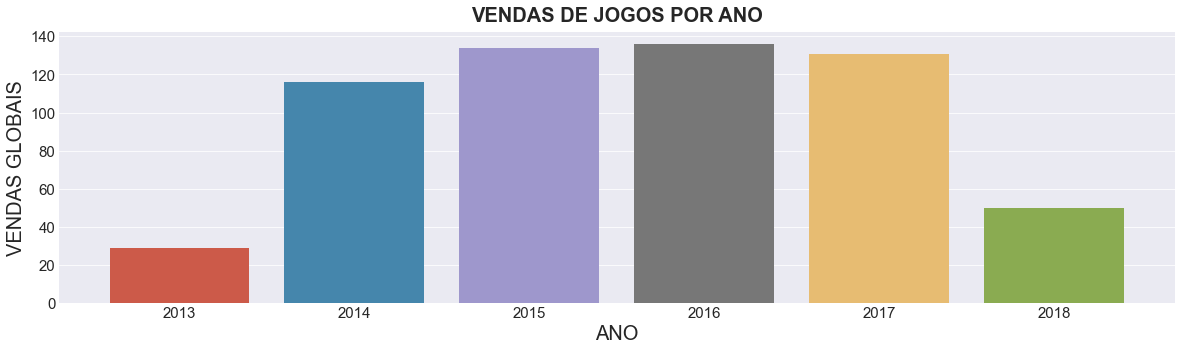

In [137]:
# ANALISE DE VENDAS DE JOGOS POR ANO
data1 = data.loc[data['Year'] < 2019]
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.grid(axis='x')
plt.title('VENDAS DE JOGOS POR ANO', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
sns.barplot(data=data1, x='Year', y='Global', ci=None, estimator=sum)
plt.xticks(size=15,)
plt.xlabel('ANO', size=20)
plt.ylabel('VENDAS GLOBAIS', size=20)
plt.yticks(size=15)
plt.plot()


[]

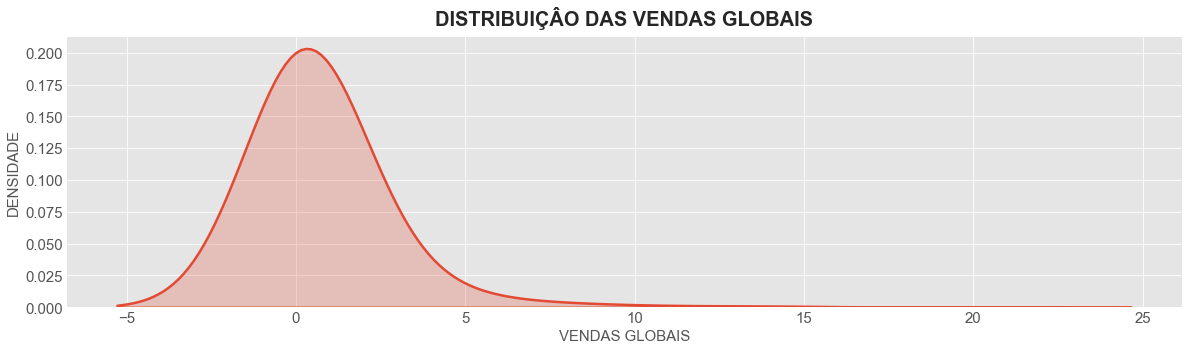

In [128]:
# ANALISE DAS DISTRIBUIÇÔES DAS VENDAS GLOBAIS
plt.figure(figsize=(20, 5))
plt.style.use('ggplot')
plt.title('DISTRIBUIÇÂO DAS VENDAS GLOBAIS', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
sns.kdeplot(data=data['Global'], shade=True,
            bw=1, linewidth=2.5)
plt.xticks(size=15,)
plt.xlabel('VENDAS GLOBAIS', size=15)
plt.ylabel('DENSIDADE', size=15)
plt.yticks(size=15)
plt.plot()


In [129]:
# DISTRIBUIÇÂO DAS VENDAS POR REGIÃO
analise2 = data.groupby(by=['Year']).sum(
)[['North America', 'Europe', 'Japan', 'Rest of World']]
analise2 = analise2.reset_index()
analise2 = analise2.loc[analise2['Year'] < 2019]


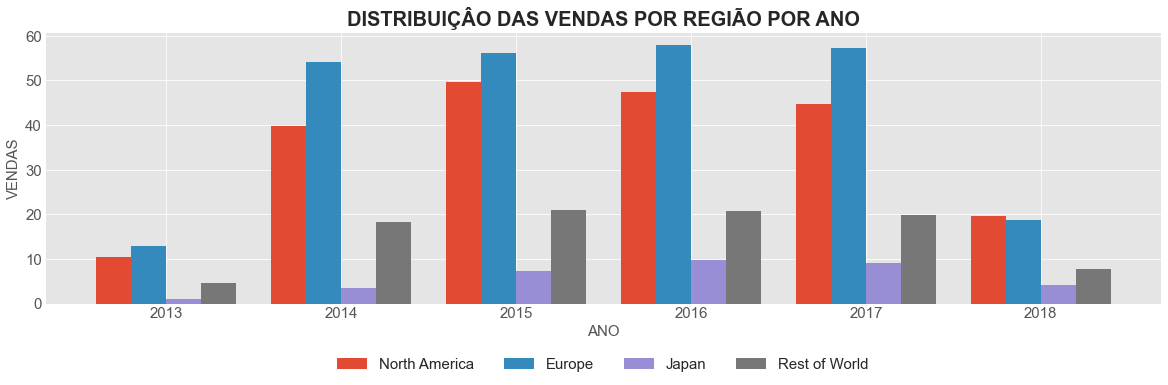

In [130]:
x = np.arange(len(analise2['Year']))
plt.figure(figsize=(20, 5))
plt.title('DISTRIBUIÇÂO DAS VENDAS POR REGIÃO POR ANO',
          fontdict={'weight': 'bold', 'size': 20})
plt.bar(x-0.3, analise2['North America'], width=0.2)
plt.bar(x-0.1, analise2['Europe'], width=0.2)
plt.bar(x+0.1, analise2['Japan'], width=0.2)
plt.bar(x+0.3, analise2['Rest of World'], width=0.2)
plt.xlabel("ANO", size=15)
plt.ylabel("VENDAS", size=15)
plt.legend(list(analise2.columns)[1:], fontsize=15,
           loc='best', bbox_to_anchor=(0.75, -0.15), ncol=4)
plt.xticks(x, list(analise2['Year']), size=15)
plt.yticks(size=15)
plt.show()


In [131]:
total = data.sum()['Global']
regioes = ['North America', 'Europe', 'Japan', 'Rest of World']
porcent = []
analise3 = data.sum()[regioes]
for i in analise3:
    porcent.append((i/total)*100)
analise3 = pd.DataFrame(list(zip(regioes, porcent)), columns=[
                        'Região', 'Porcentagem de Vendas'])
analise3['Porcentagem de Vendas'] = pd.to_numeric(
    analise3['Porcentagem de Vendas']).apply(lambda line: round(line, 2))
analise3


,Região,Porcentagem de Vendas
0,North America,35.53
1,Europe,43.17
2,Japan,5.83
3,Rest of World,15.46


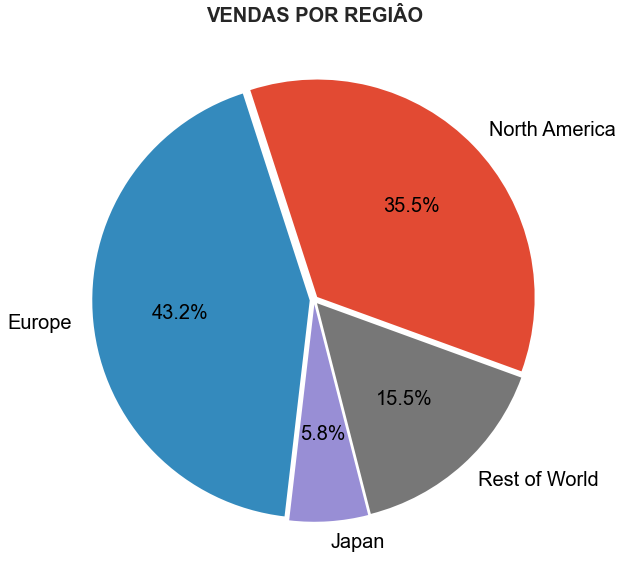

In [132]:
plt.figure(figsize=(20, 10))
plt.title('VENDAS POR REGIÂO', fontdict={'weight': 'bold', 'size': 20})
plt.pie(
    analise3['Porcentagem de Vendas'],
    labels=analise3['Região'],
    rotatelabels=False,
    wedgeprops={'linewidth': 25},
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black', 'size': 20})
plt.show()


In [133]:
analise4 = data.groupby(by=['Publisher']).sum()['Global'].reset_index().sort_values('Global', ascending=False).reset_index(drop=True)
top10 = analise4.head(10)
other = pd.DataFrame([('Outros', analise4.loc[analise4.index >= 10].sum()['Global'])], columns=['Publisher', 'Global'])
analise4 = top10.append(other).reset_index(drop=True)


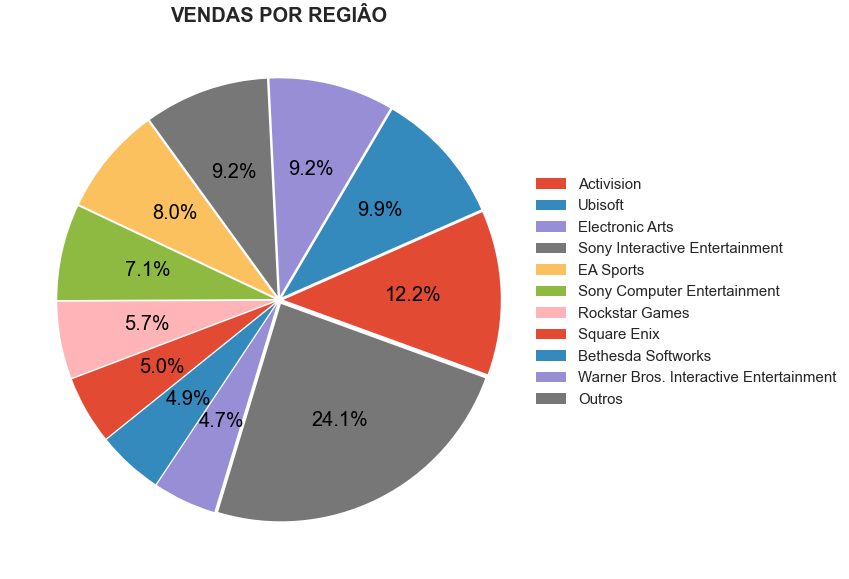

In [134]:
plt.figure(figsize=(20, 10))
plt.title('VENDAS POR REGIÂO', fontdict={'weight': 'bold', 'size': 20})
plt.pie(
    analise4['Global'],
    rotatelabels=False,
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black', 'size': 20})
plt.legend(list(analise4['Publisher']), fontsize=15,
           loc='upper right', bbox_to_anchor=(1.55, 0.75), ncol=1)
plt.show()

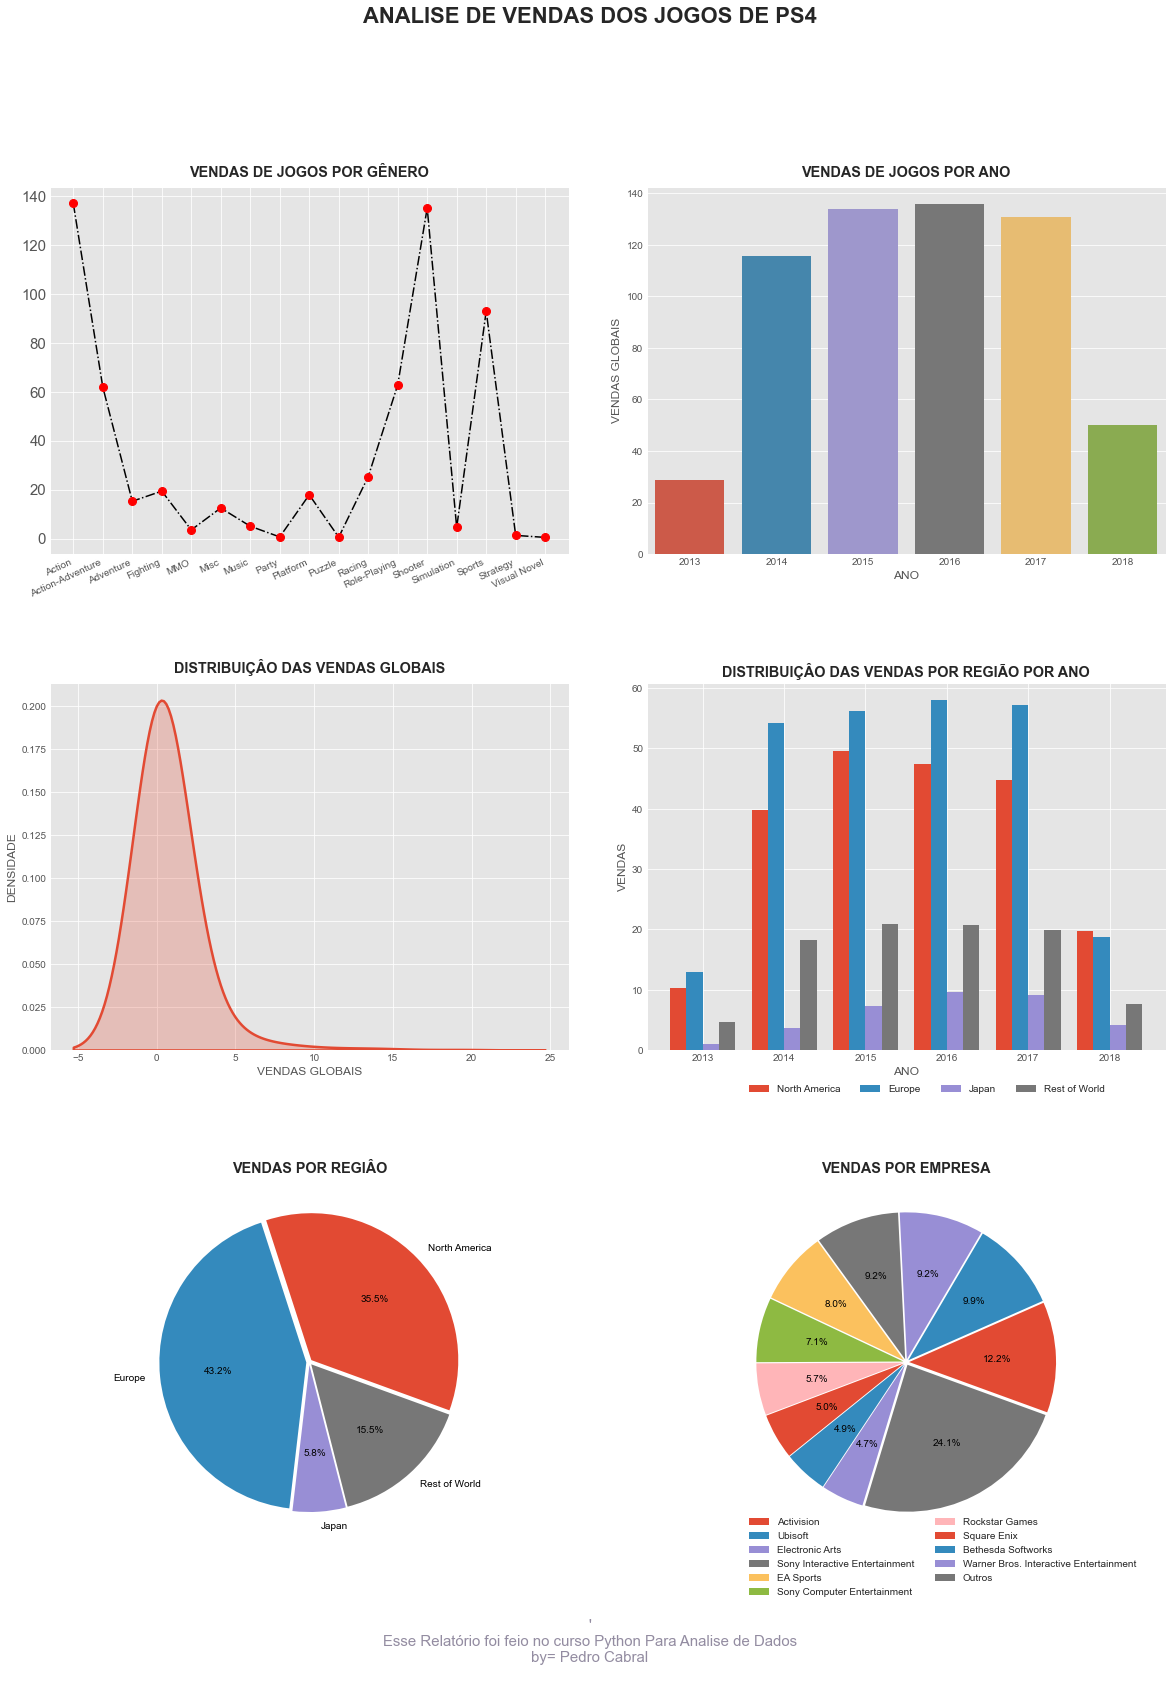

In [156]:
fig, ax = plt.subplots(figsize=(20, 25))
plt.suptitle('ANALISE DE VENDAS DOS JOGOS DE PS4', fontsize=22, fontweight=600)
columns = 3
lines = 2

# VENDAS DE JOGOS POR GÊNERO
plt.subplot(columns, lines, 1)
plt.title('VENDAS DE JOGOS POR GÊNERO', pad=10,
          fontdict={'weight': 'bold'})
plt.plot(analise['Genre'], analise['Global'], color='black', marker='o', ms=8,
         mec='red', markerfacecolor='red', ls='-.')
plt.xticks(rotation=25, ha='right')
plt.yticks(size=15)

# <--- GRÁFICO: VENDAS DE JOGOS POR ANO
plt.subplot(columns, lines, 2)
data1 = data.loc[data['Year'] < 2019]
plt.grid(axis='x')
plt.title('VENDAS DE JOGOS POR ANO', pad=10,
          fontdict={'weight': 'bold'})
sns.barplot(data=data1, x='Year', y='Global', ci=None, estimator=sum)
plt.xlabel('ANO')
plt.ylabel('VENDAS GLOBAIS')

# <--- GRÁFICO: DISTRIBUIÇÂO DAS VENDAS GLOBAIS
plt.subplot(columns, lines, 3)
plt.style.use('ggplot')
plt.title('DISTRIBUIÇÂO DAS VENDAS GLOBAIS', pad=10,
          fontdict={'weight': 'bold'})
sns.kdeplot(data=data['Global'], shade=True,
            bw=1, linewidth=2.5)
plt.xlabel('VENDAS GLOBAIS')
plt.ylabel('DENSIDADE')

# <--- GRÁFICO: DISTRIBUIÇÂO DAS VENDAS POR REGIÃO POR ANO
plt.subplot(columns, lines, 4)
x = np.arange(len(analise2['Year']))
plt.title('DISTRIBUIÇÂO DAS VENDAS POR REGIÃO POR ANO',
          fontdict={'weight': 'bold'})
plt.bar(x-0.3, analise2['North America'], width=0.2)
plt.bar(x-0.1, analise2['Europe'], width=0.2)
plt.bar(x+0.1, analise2['Japan'], width=0.2)
plt.bar(x+0.3, analise2['Rest of World'], width=0.2)
plt.xlabel("ANO")
plt.ylabel("VENDAS")
plt.legend(list(analise2.columns)[1:],
           loc='best', bbox_to_anchor=(0.9, -0.07), ncol=4)
plt.xticks(x, list(analise2['Year']))

# <--- GRÁFICO: VENDAS POR REGIÂO
plt.subplot(columns, lines, 5)
plt.title('VENDAS POR REGIÂO', fontdict={'weight': 'bold'})
plt.pie(
    analise3['Porcentagem de Vendas'],
    labels=analise3['Região'],
    rotatelabels=False,
    wedgeprops={'linewidth': 25},
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black'})

# <--- GRÁFICO: VENDAS POR EMPRESA
plt.subplot(columns, lines, 6)
plt.title('VENDAS POR EMPRESA', fontdict={'weight': 'bold'}, ha='center')
plt.pie(
    analise4['Global'],
    rotatelabels=False,
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black'})
plt.legend(list(analise4['Publisher']), bbox_to_anchor=(1.15, 0.1), ncol=2)

rodape = ''''
Esse Relatório foi feio no curso Python Para Analise de Dados
by= Pedro Cabral
'''
fig.text(0.5, 0.05, rodape, ha='center', va='bottom', size=15, color='#938ca1')
plt.subplots_adjust(hspace= 0.35, wspace=0.15)
plt.show()

In [136]:
data.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
